# DBSCAN clustering

### Iris 실습

In [118]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data=pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [122]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [120]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

model = DBSCAN(eps=0.5,min_samples=5)
predict=pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

r=pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


In [123]:
r

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


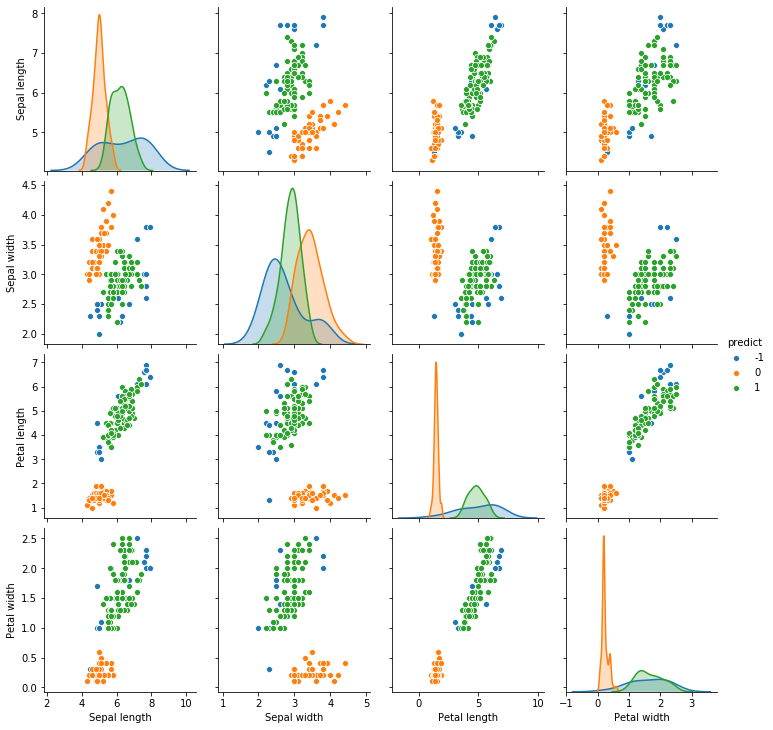

In [9]:
# visualize

sns.pairplot(r,hue='predict')
plt.show()

-------------

### 실제 데이터 분석

In [1]:
import json
import re # regular expression
import gc # to collect memory
from datetime import datetime

import pandas as pd
import numpy as np

# for NLP
# from konlpy.tag import Kkma
# from konlpy.utils import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load json files
with open("C:/Users/user/Kakao Arena/data/genre_gn_all.json", encoding = 'utf-8') as json_file: genre = json.load(json_file)
with open("C:/Users/user/Kakao Arena/data/song_meta.json", encoding = 'utf-8') as json_file: song_meta = json.load(json_file)
with open("C:/Users/user/Kakao Arena/data/train.json", encoding = 'utf-8') as json_file: train = json.load(json_file)
with open("C:/Users/user/Kakao Arena/data/val.json", encoding = 'utf-8') as json_file: valid = json.load(json_file)
    
# json to dataframe
df_genre = pd.Series(genre).to_frame('genre').reset_index().rename({'index' : 'gen_id'}, axis = 1)
df_song_meta = pd.DataFrame(song_meta)
df_train = pd.DataFrame(train)
df_valid = pd.DataFrame(valid)

In [3]:
#song_meta에서 장르만 뽑음 gnr_meta
gnr_meta=df_song_meta[['song_gn_dtl_gnr_basket','id']]
gnr_meta

,song_gn_dtl_gnr_basket,id
0,[GN0901],0
1,"[GN1601, GN1606]",1
2,[GN0901],2
3,"[GN1102, GN1101]",3
4,"[GN1802, GN1801]",4
...,...,...
707984,[GN2001],707984
707985,[GN0901],707985
707986,"[GN0105, GN0101]",707986
707987,"[GN1807, GN1801]",707987


In [4]:
df_train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


In [5]:
#playlist의 songs만 추출
playlist_songs=df_train['songs']
playlist_songs

0         [525514, 129701, 383374, 562083, 297861, 13954...
1         [432406, 675945, 497066, 120377, 389529, 24427...
2         [83116, 276692, 166267, 186301, 354465, 256598...
3         [394031, 195524, 540149, 287984, 440773, 10033...
4         [159327, 553610, 5130, 645103, 294435, 100657,...
                                ...                        
115066    [429629, 441511, 612106, 516359, 691768, 38714...
115067    [321330, 216057, 534472, 240306, 331098, 23288...
115068    [50512, 249024, 250608, 371171, 229942, 694943...
115069    [533534, 608114, 343608, 417140, 609009, 30217...
115070    [26008, 456354, 324105, 89871, 135272, 143548,...
Name: songs, Length: 115071, dtype: object

In [6]:
#train의 playlist 노래 장르 카운트
gnr_df3=df_genre.drop('genre',axis=1)

# gnr_Df3=gnr_df3
# gnr_Df3['a']=100
# gnr_Df3.head(10)

In [8]:
playlist_songs[0]

[525514,
 129701,
 383374,
 562083,
 297861,
 139541,
 351214,
 650298,
 531057,
 205238,
 706183,
 127099,
 660493,
 461973,
 121455,
 72552,
 223955,
 324992,
 50104]

In [14]:
list=[]
a=gnr_meta.loc[324992,'song_gn_dtl_gnr_basket'] # gn0901

b=gnr_meta.loc[50104,'song_gn_dtl_gnr_basket'] # gn1101,1102
list.append(a)
list.append(b)
print (list)

[['GN0901'], ['GN1102', 'GN1101']]


In [15]:
t=1
n=0
for p in playlist_songs:
    gnr_list=[]
    for song in p:
        g=gnr_meta.loc[song,'song_gn_dtl_gnr_basket']
        #print (g)
        try: #결측값 패스
            if len(g)==1:
                gnr_list.append(g[0])
            else:            
                for i in g:
                    gnr_list.append(i)
        
        except: pass
    gnr_df3[str(n)]=0
    
    for z in gnr_list:
        gnr_df3.loc[gnr_df3['gen_id']==z,str(n)]+=1
            
    
    n+=1
    t+=1
    print (t)
    if t==100:

        break

KeyboardInterrupt: 

In [129]:
gnr_df3

,gen_id,0,1,2,3,4,5,6,7,8
0,GN0100,0,0,0,0,0,0,0,0,0
1,GN0101,0,11,2,14,5,0,30,12,5
2,GN0102,0,0,0,0,0,0,0,0,0
3,GN0103,0,1,0,1,3,0,0,1,0
4,GN0104,0,3,0,0,0,0,8,7,0
...,...,...,...,...,...,...,...,...,...,...
249,GN2900,0,0,0,0,0,0,0,0,0
250,GN2901,0,0,0,0,0,0,0,0,0
251,GN2902,0,0,0,0,0,0,0,0,0
252,GN2903,0,0,0,0,0,0,0,0,0


In [130]:
feature=gnr_df3.iloc[:,1:].T
gen=gnr_df3.gen_id.T

feature

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11,0,1,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,14,0,1,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,0,3,0,0,0,42,0,30,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,30,0,0,8,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,12,0,1,7,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,5,0,0,0,4,0,23,0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
gen

0      GN0100
1      GN0101
2      GN0102
3      GN0103
4      GN0104
        ...  
249    GN2900
250    GN2901
251    GN2902
252    GN2903
253    GN3000
Name: gen_id, Length: 254, dtype: object

In [164]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

feature['predict']=predict.values

r=feature.drop('a',axis=1)

r

# concatenate labels to df as a new column
#r_ = feature.T.append(predict.T)
# r=pd.concat([feature,predict],join='outer')
# r

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,predict
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,0,11,0,1,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,0,14,0,1,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0,5,0,3,0,0,0,42,0,30,...,0,0,0,0,0,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6,0,30,0,0,8,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7,0,12,0,1,7,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,-1
8,0,5,0,0,0,4,0,23,0,1,...,0,0,0,0,0,0,0,0,0,-1


In [95]:
gnr_df4=r.set_index('gen_id').T
#gnr_df2=gnr_df1.drop(gnr_df1.index[0])
gnr_df4 
#gnr_df3=gnr_df2.drop('gen_id',axis=1,inplace=True)



gen_id,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,GN0202,GN0203,...,GN2802,GN2803,GN2804,GN2805,GN2806,GN2900,GN2901,GN2902,GN2903,GN3000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,11,0,1,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,14,0,1,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,0,3,0,0,0,42,0,30,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,30,0,0,8,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,12,0,1,7,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,5,0,0,0,4,0,23,0,1,...,0,0,0,0,0,0,0,0,0,0
predict,0,-1,0,-1,-1,-1,0,-1,0,-1,...,0,0,0,0,0,0,0,0,0,0


feature는 장르(gnr_df4), 254열